In [1]:
from ArticlesRep import MeanSimilarityoneindustry,MeanSimilaritytwoindustry #common function

import pandas as pd

import numpy as np

%matplotlib inline

import pickle

import visdom

from tqdm import tnrange, tqdm_notebook
from tqdm.autonotebook import tqdm
tqdm.pandas()

from time import time,sleep
from datetime import datetime

from sklearn.metrics.pairwise import cosine_similarity
# import visdom
# vis=visdom.Visdom()
# env="TagBased"

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# %matplotlib inline

import re
import sys
from pprint import pprint
#coding:utf-8

#solved chinese display in matplotlib
from pylab import mpl
mpl.rcParams["font.family"] = 'DFKai-sb' 
mpl.rcParams['axes.unicode_minus'] = False

from matplotlib import pyplot as plt

list_industry=["水泥","食品飲料","石化","紡織","電機機械","電器電纜","化學工業",
               "建材居家用品","造紙","鋼鐵金屬","車輛相關","科技相關","營建地產","運輸","觀光休閒娛樂",
               "金融相關","百貨通路","公用事業","控股","生技醫療保健","農林漁牧","航天軍工","能源","傳播出版","綜合",
               "傳產其他","其他","金屬礦採選",
              ]
element="氫氦鋰鈹硼碳氮氧氟氖鈉鎂鋁矽磷硫氯氬鉀鈣鈧鈦釩鉻錳鐵鈷鎳銅鋅鎵鍺砷硒溴氪銣鍶銀鎘銦錫銻碲碘氙銫鋇鉑金汞鉈鉛鉍釙氡鍅鐳"

C:\Users\garyyu\AppData\Local\Continuum\anaconda3\envs\deeplearningcpu\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
df=pd.read_hdf("Model/history.h5")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000279936779E8>,
      dtype=object)

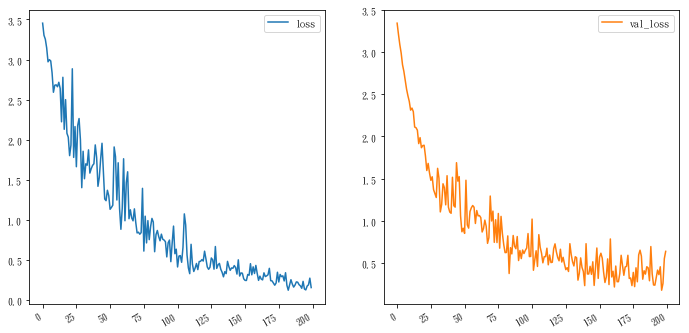

In [16]:
df[["loss","val_loss"]][:200].plot(subplots=True,layout=(1,3),figsize=(18,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000279938CCC88>,
      dtype=object)

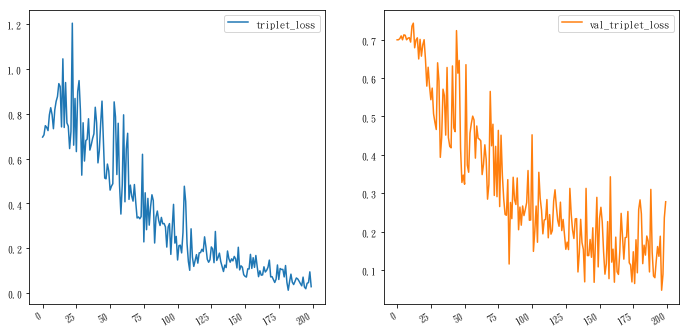

In [17]:
df[["triplet_loss","val_triplet_loss"]][:200].plot(subplots=True,layout=(1,3),figsize=(18,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027991FF6F60>,
      dtype=object)

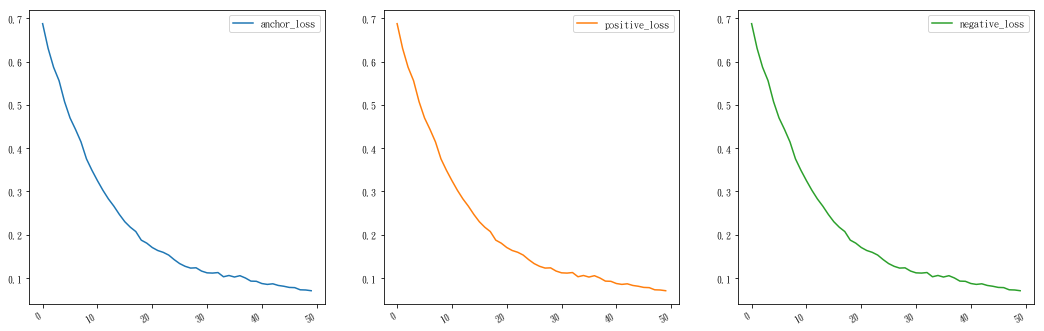

In [12]:
df[["anchor_loss","positive_loss","negative_loss"]][:50].plot(subplots=True,layout=(1,3),figsize=(18,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027991D6F080>,
      dtype=object)

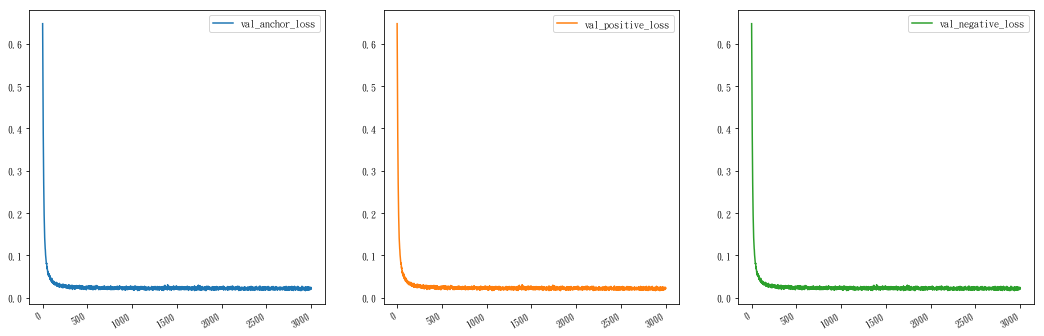

In [8]:
df[["val_anchor_loss","val_positive_loss","val_negative_loss"]].plot(subplots=True,layout=(1,3),figsize=(18,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027991E1E080>,
      dtype=object)

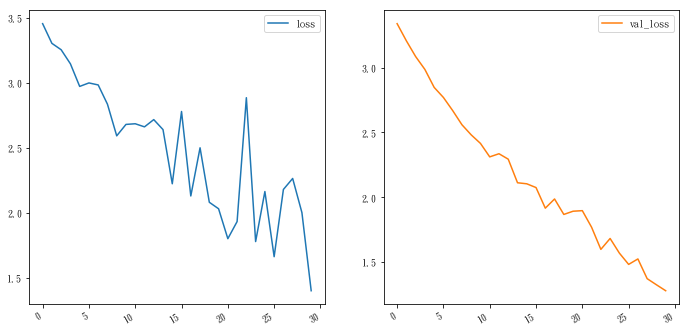

In [9]:
df[["loss","val_loss"]][:30].plot(subplots=True,layout=(1,3),figsize=(18,6))

In [20]:
df["triplet_loss"][342:343]

342    0.016787
Name: triplet_loss, dtype: float64

In [104]:
l=800
triplet_loss=pd.read_csv("run_model1-tag-triplet_loss.csv")
triplet_loss=triplet_loss[:l]["Value"]
val_triplet_loss=pd.read_csv("run_model1-tag-val_triplet_loss.csv")
val_triplet_loss=val_triplet_loss[:l]["Value"]

loss=pd.read_csv("run_model1-tag-loss.csv")
loss=loss[:l]["Value"]
val_loss=pd.read_csv("run_model1-tag-val_loss.csv")
val_loss=val_loss[:l]["Value"]

negative_loss=pd.read_csv("run_model1-tag-negative_loss.csv")
negative_loss=negative_loss[:l]["Value"]
val_negative_loss=pd.read_csv("run_model1-tag-val_negative_loss.csv")
val_negative_loss=val_negative_loss[:l]["Value"]

df2=pd.DataFrame({"loss":loss,"val_loss":val_loss,
                  "negative_loss":negative_loss,"val_negative_loss":val_negative_loss,
                  "triplet_loss":triplet_loss,"val_triplet_loss":val_triplet_loss})

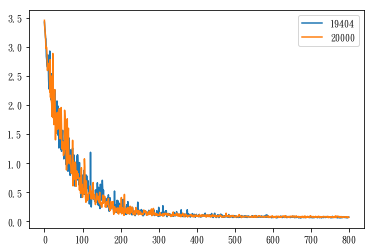

In [105]:
_ = pd.DataFrame({20000:df["loss"][:l],19404:df2["loss"][:l]})
_.plot()

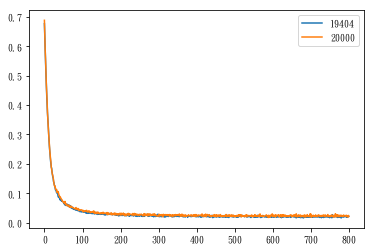

In [106]:
column="negative_loss"
_ = pd.DataFrame({20000:df[column][:l],19404:df2[column][:l]})
_.plot()

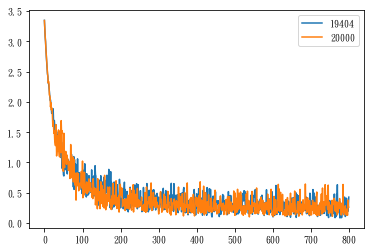

In [107]:
column="val_loss"
_ = pd.DataFrame({20000:df[column][:l],19404:df2[column][:l]})
_.plot()

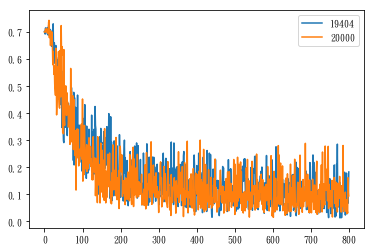

In [110]:
column="val_triplet_loss"
_ = pd.DataFrame({20000:df[column][:l],19404:df2[column][:l]})
_.plot()

## Plot Tsene every 50 epochs

#### load encoder model

In [45]:
from keras.models import load_model

Using TensorFlow backend.


In [53]:
def losspassfunction(y_true,y_pred):
    return y_pred
Tri_AutoEncoder=load_model("Models/Model1/Tri_AutoEncoder.initial.h5",custom_objects={"losspassfunction":losspassfunction})
Tri_AutoEncoder.load_weights("Models/Model1/regular/weights.600.hdf5")
encoder=Tri_AutoEncoder.layers[3]

#### load data

In [2]:
Data=np.load("D:3.AutoencoderForArticle/BOW_binary_v02.npy")

In [3]:
with open("D:3.AutoencoderForArticle/train_dict_collect_small_industry","rb") as f:
    train_dict_collect_small_industry=pickle.load(f)

In [4]:
with open("D:3.AutoencoderForArticle/test_dict_collect_small_industry","rb") as f:
    test_dict_collect_small_industry=pickle.load(f)

In [55]:
test_x=np.load("D:3.AutoencoderForArticle/test_x_v2.npy")
test_y=np.load("D:3.AutoencoderForArticle/test_y_v2.npy")

#### Embedding

In [56]:
emnedding_test_x=encoder.predict(test_x)

#### TSEN

In [60]:
from sklearn.manifold import TSNE
from scipy.spatial.distance import cosine
#set
tsne_data=emnedding_test_x
c=test_y
#metric
def dot(u,v):
    u=np.asarray(u)
    v=np.asarray(v)
    uv=np.dot(u,v)
    sig=1/(1+np.exp(-uv))
    return 1-sig

tsne = TSNE(n_components=2, random_state=0,perplexity=40,n_iter=1000,metric=dot,verbose=2)
intermediates_tsne=tsne.fit_transform(tsne_data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 332 samples in 0.015s...
[t-SNE] Computed neighbors for 332 samples in 0.836s...
[t-SNE] Computed conditional probabilities for sample 332 / 332
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.088s
[t-SNE] Iteration 50: error = 59.9196930, gradient norm = 0.4809909 (50 iterations in 0.394s)
[t-SNE] Iteration 100: error = 63.7017441, gradient norm = 0.4103963 (50 iterations in 0.281s)
[t-SNE] Iteration 150: error = 65.8296051, gradient norm = 0.3982219 (50 iterations in 0.480s)
[t-SNE] Iteration 200: error = 64.2322006, gradient norm = 0.3927716 (50 iterations in 0.276s)
[t-SNE] Iteration 250: error = 62.4267273, gradient norm = 0.4200222 (50 iterations in 0.556s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.426727
[t-SNE] Iteration 300: error = 0.2849778, gradient norm = 0.0084733 (50 iterations in 0.572s)
[t-SNE] Iteration 350: error = 0.2241472, gradient norm = 0.0054281 

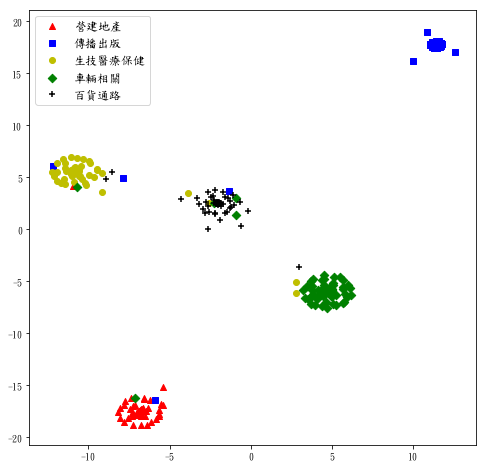

In [69]:
#plot
color=["r","b","y","g","k"]
marker=["^","s","o","D","+"]

plt.figure(figsize=(8, 8),)
for i,k in enumerate(set(c)):
    c=np.asarray(c)
    pick=c==k
    plt.scatter(x = intermediates_tsne[pick,0], y=intermediates_tsne[pick,1],c=color[i],marker=marker[i],label=k,)
plt.legend(fontsize=12)
plt.savefig("tsnefig/fig1.png")

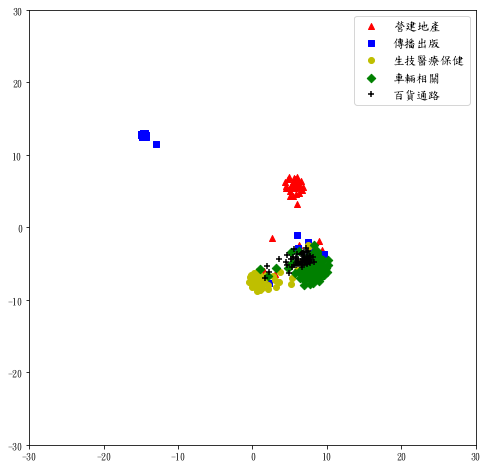

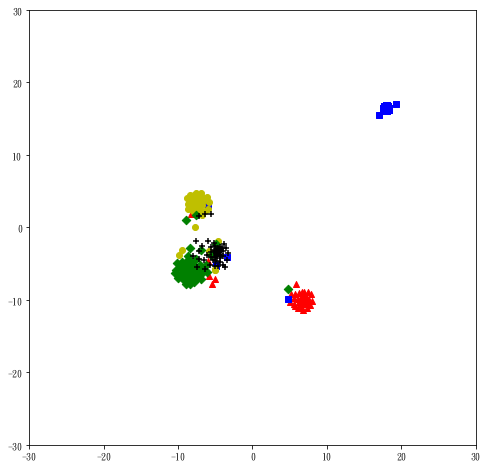

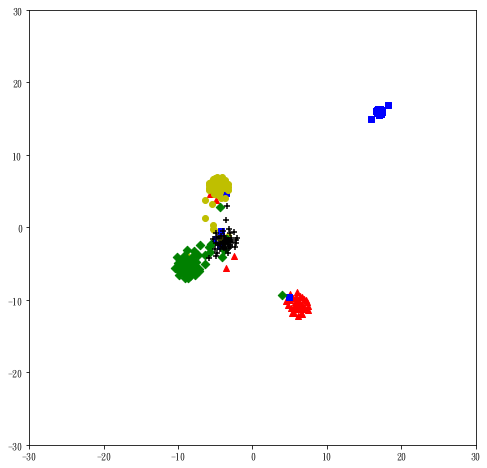

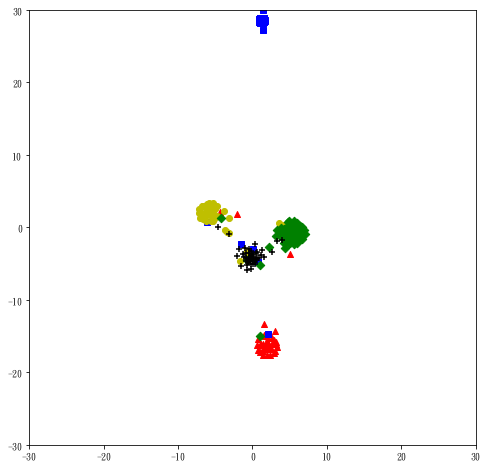

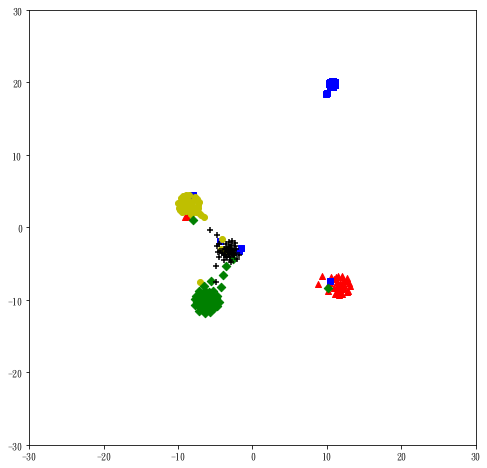

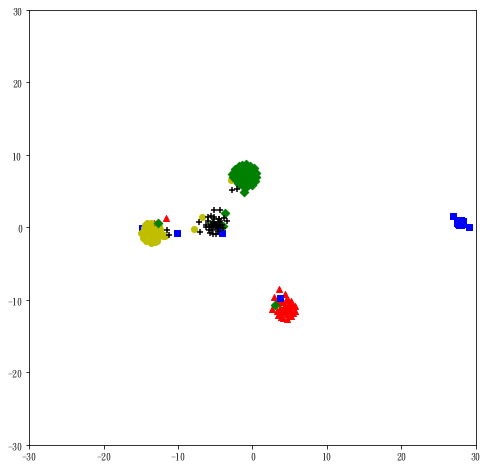

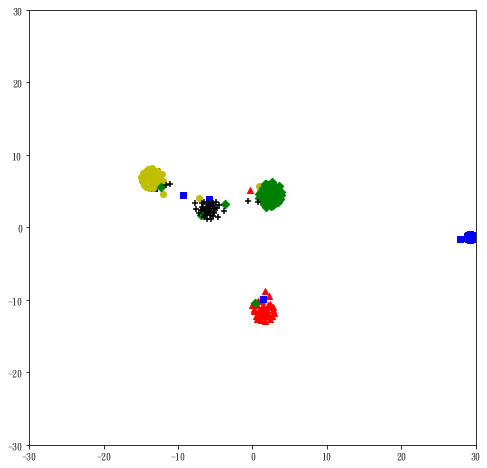

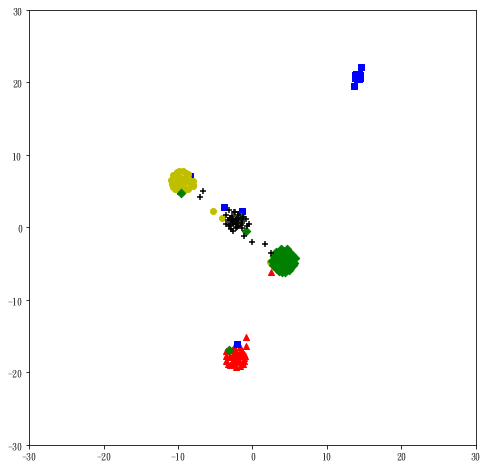

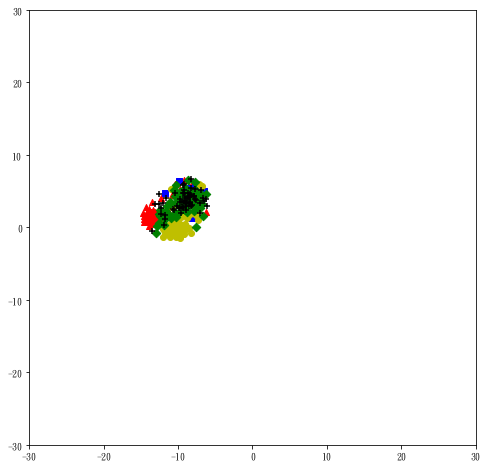

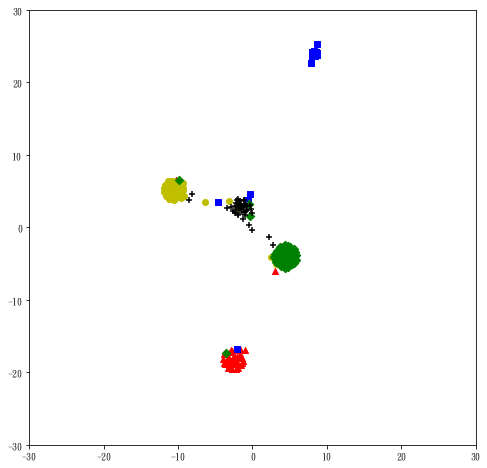

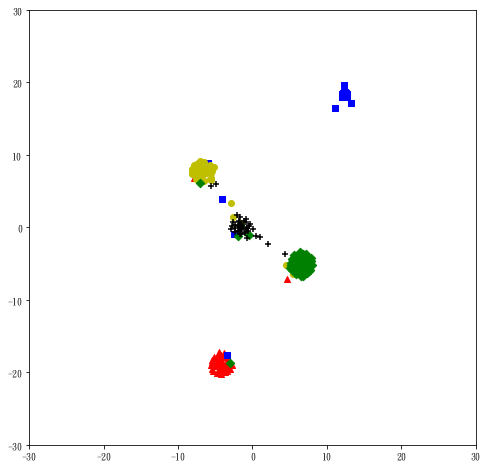

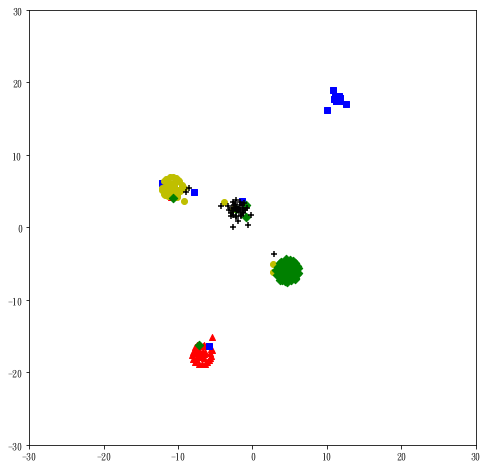

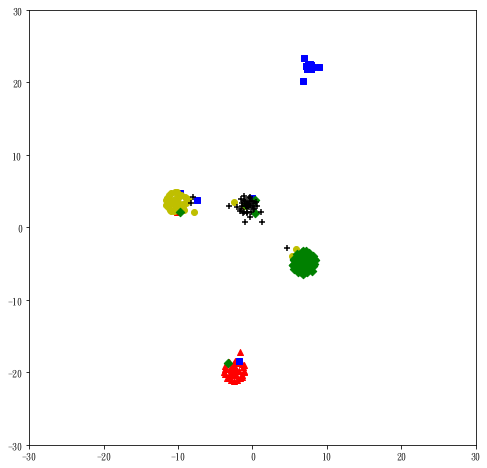

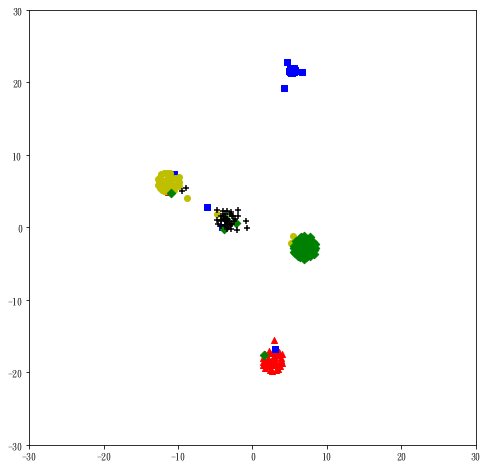

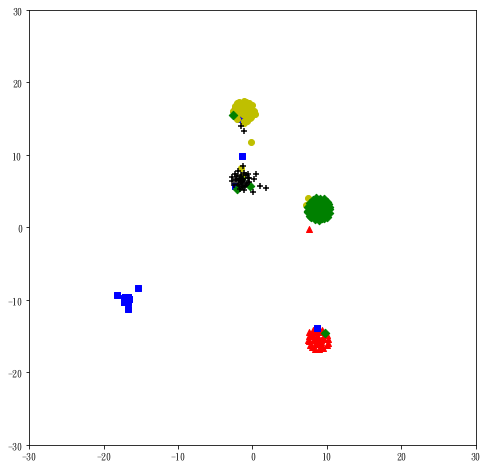

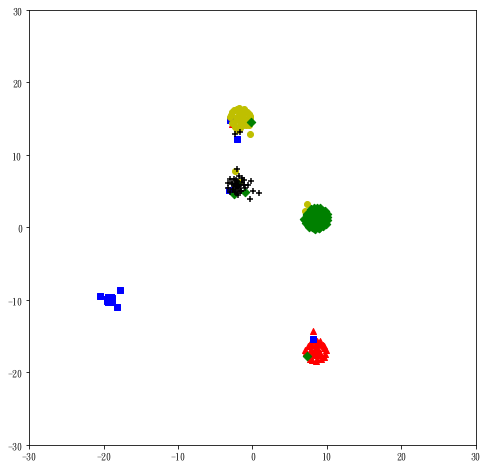

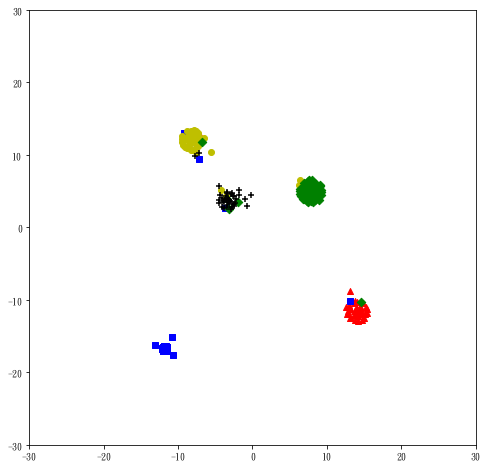

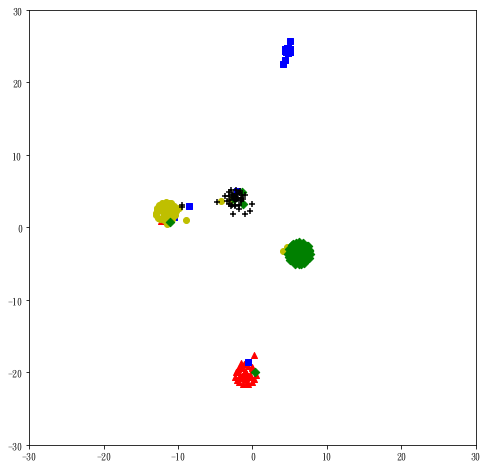

In [78]:
import os
def dot(u,v):
    u=np.asarray(u)
    v=np.asarray(v)
    uv=np.dot(u,v)
    sig=1/(1+np.exp(-uv))
    return 1-sig
weightlist=os.listdir("Models/Model1/regular/")
tsen_result=[]
for j,w in enumerate(tqdm_notebook(weightlist)):
    Tri_AutoEncoder.load_weights("Models/Model1/regular/{}".format(w))
    encoder=Tri_AutoEncoder.layers[3]
    emnedding_test_x=encoder.predict(test_x)
    
    tsne_data=emnedding_test_x
    c=test_y
    
    tsne = TSNE(n_components=2, random_state=0,perplexity=40,n_iter=1000,metric=dot,verbose=0)
    intermediates_tsne=tsne.fit_transform(tsne_data)
    tsen_result.append(intermediates_tsne)

    #plot
    color=["r","b","y","g","k"]
    marker=["^","s","o","D","+"]

    plt.figure(figsize=(8, 8),)
    for i,k in enumerate(set(c)):
        c=np.asarray(c)
        pick=c==k
        plt.scatter(x = intermediates_tsne[pick,0], y=intermediates_tsne[pick,1],c=color[i],marker=marker[i],label=k,)
    if j==0:plt.legend(fontsize=12)
    plt.xlim((-30,30))
    plt.ylim((-30,30))
    plt.savefig("tsnefig/fig{}.png".format(j))
    

(-30, 30)

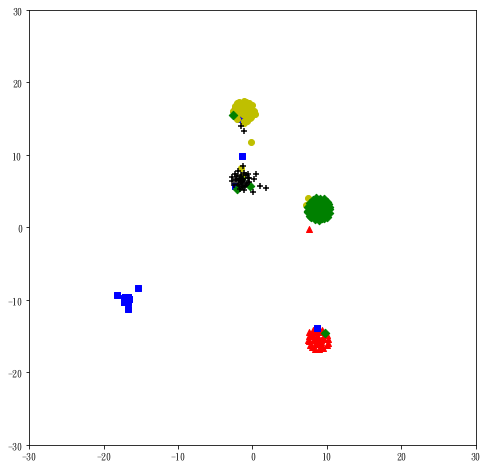

In [77]:
#plot
color=["r","b","y","g","k"]
marker=["^","s","o","D","+"]

plt.figure(figsize=(8, 8),)
for i,k in enumerate(set(c)):
    c=np.asarray(c)
    pick=c==k
    plt.scatter(x = intermediates_tsne[pick,0], y=intermediates_tsne[pick,1],c=color[i],marker=marker[i],label=k,)
# plt.legend(fontsize=12)
plt.xlim((-30,30))
plt.ylim((-30,30))
# plt.savefig("tsnefig/fig{}.png".format(j))